**Created by Berkay Alan**

** **

**31 of August, 2022**

**Time Series with Pandas**

**For more Tutorial**: https://www.kaggle.com/berkayalan

# Content

- Datetime-Index

- Time Resampling

- Time Shifting

- Rolling and Expanding

- Visualizing Time Series Data

# Resources

- [**Pandas' all time series modules**](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#overview)

- [**Pandas Range Function**](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)

- [**Pandas list of frequency aliases**](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases)

- [**Yahoo Finance**](https://finance.yahoo.com/quote/AAPL/history?period1=1546300800&period2=1661817600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

- [**Python strftime cheatsheet**](https://strftime.org/)

- [**Python Data Science Handbook**](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#:~:text=Pandas%20Time%20Series%20Data%20Structures&text=For%20time%20stamps%2C%20Pandas%20provides,associated%20Index%20structure%20is%20DatetimeIndex%20.)

- [**Tutorial: Time Series Analysis with Pandas**](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)

# Check Versions

**Python Version**

In [306]:
from platform import python_version
python_version()

'3.9.12'

**Pip Version**

In [307]:
pip --version

pip 21.2.4 from /Users/berkayalan/opt/anaconda3/lib/python3.9/site-packages/pip (python 3.9)
Note: you may need to restart the kernel to use updated packages.


# Installing Libraries

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
from datetime import datetime


from warnings import filterwarnings
filterwarnings('ignore')

In order to see all rows and columns, we will increase max display numbers of dataframe.

In [310]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

# Datetime-Index

In [315]:
year = 2022
month = 8 #August
day = 30
hour = 20
minute = 45
sec = 30

In [243]:
my_date = datetime(year,month,day)

In [244]:
my_date

datetime.datetime(2022, 8, 30, 0, 0)

In [245]:
my_datetime = datetime(year,month,day,hour,minute,sec)

In [246]:
my_datetime

datetime.datetime(2022, 8, 30, 20, 45, 30)

In [247]:
my_datetime.year

2022

In [248]:
my_datetime.month

8

In [249]:
my_datetime.weekday()

1

<div class="alert alert-block alert-info">
<b>Note:</b> Normally 30 August is the second day of week. But the index begins from zero.
</div>

Let's check date in numpy.

In [250]:
np.array(["2022-05-07","2022-08-06","2022-08-30"])

array(['2022-05-07', '2022-08-06', '2022-08-30'], dtype='<U10')

We did not specify the data format, that's why numpy will recognize them as string. To do them datetime, we will specify the format as below.

In [251]:
np.array(["2022-05-07","2022-08-06","2022-08-30"],dtype="datetime64")

array(['2022-05-07', '2022-08-06', '2022-08-30'], dtype='datetime64[D]')

D means day precision. We can also specify it.

In [252]:
np.array(["2022-05-07","2022-08-06","2022-08-30"],dtype="datetime64[Y]")

array(['2022', '2022', '2022'], dtype='datetime64[Y]')

In [253]:
np.array(["2022-05-07","2022-08-06","2022-08-30"],dtype="datetime64[h]")

array(['2022-05-07T00', '2022-08-06T00', '2022-08-30T00'],
      dtype='datetime64[h]')

Now we will look numpy date ranges.

In [254]:
np.arange(0,20,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

Let's get all weeks between two days.

In [255]:
np.arange(start = "2022-05-07",
          stop = "2022-08-30", 
          step = 7 ,
          dtype = "datetime64[D]")

array(['2022-05-07', '2022-05-14', '2022-05-21', '2022-05-28',
       '2022-06-04', '2022-06-11', '2022-06-18', '2022-06-25',
       '2022-07-02', '2022-07-09', '2022-07-16', '2022-07-23',
       '2022-07-30', '2022-08-06', '2022-08-13', '2022-08-20',
       '2022-08-27'], dtype='datetime64[D]')

In [256]:
np.arange(start = "1990",
          stop = "2020", 
          step = 1 ,
          dtype = "datetime64[Y]")

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='datetime64[Y]')

**Datetime Objects in Pandas**

In general, we will work with time series as a datetime index while we're using pandas dataframes. Fortunately pandas has a lot of functions and methods to work with time series!

For more on the pandas DatetimeIndex visit the pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/timeseries.html).

In [257]:
pd.date_range(start = "2022-01-01", periods=7, freq= "D")

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07'], dtype='datetime64[ns]', freq='D')

As we can see it returns the range of equally spaced time points. DatetimeIndex is an immutable container for datetimes and it returns as nanoseconds(ns). For more details, please check the [official page](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html) of date_range function.

When we used pd.date_range() above, we had to pass in a frequency parameter 'D'. This created a series of 7 dates spaced one day apart. A list of time series offset aliases like 'D' can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).

In [258]:
pd.date_range(start = "Aug 06, 2022", periods=7, freq= "D")

DatetimeIndex(['2022-08-06', '2022-08-07', '2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12'], dtype='datetime64[ns]', freq='D')

As you can see, pandas can also understand different formats.

We also can use *pd.to_datetime()* function to convert dates.

In [259]:
pd.to_datetime(['Aug 30, 2022','1/12/19','16-May-2021'])

DatetimeIndex(['2022-08-30', '2019-01-12', '2021-05-16'], dtype='datetime64[ns]', freq=None)

We can also specify the format we want to convert.

In [260]:
pd.to_datetime(['1/12/2019'], format = "%d/%m/%Y")

DatetimeIndex(['2019-12-01'], dtype='datetime64[ns]', freq=None)

In [261]:
pd.to_datetime(['1--12--2022'], format = "%d--%m--%Y")

DatetimeIndex(['2022-12-01'], dtype='datetime64[ns]', freq=None)

A third option is to pass a list or an array of datetime objects into the *pd.DatetimeIndex()* function:

In [262]:
dates = np.array(['2019-04-15', '2020-05-11', '2022-10-03'], dtype='datetime64[D]')
dates

array(['2019-04-15', '2020-05-11', '2022-10-03'], dtype='datetime64[D]')

In [263]:
indexes = pd.DatetimeIndex(dates)
indexes

DatetimeIndex(['2019-04-15', '2020-05-11', '2022-10-03'], dtype='datetime64[ns]', freq=None)

# Time Resampling

For this section we'll look at Apple stock data from 2019 to 2022 which includes daily prices and volumes.

In [264]:
df = pd.read_csv('../Data/Apple.csv', parse_dates=['Date'])

In [265]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168346,148158800
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366497,365248800
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833580,234428400
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753822,219111200
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.435398,164101200


In [266]:
df.shape

(922, 7)

In [267]:
df.index

RangeIndex(start=0, stop=922, step=1)

First, we will make Date column our index.

In [268]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168346,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366497,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833580,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753822,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.435398,164101200


In [269]:
df.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-14', '2019-01-15',
               ...
               '2022-08-16', '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-29'], dtype='datetime64[ns]', name='Date', length=922, freq=None)

Resampling of time series is a common method based on the time series index. Check out the details [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html).

In [270]:
df.idxmax()

Open        2022-01-04
High        2022-01-04
Low         2022-01-04
Close       2022-01-03
Adj Close   2022-01-03
Volume      2020-02-28
dtype: datetime64[ns]

In [271]:
df.idxmin()

Open        2019-01-03
High        2019-01-03
Low         2019-01-03
Close       2019-01-03
Adj Close   2019-01-03
Volume      2021-11-11
dtype: datetime64[ns]

In [272]:
df.index.min()

Timestamp('2019-01-02 00:00:00')

In [273]:
df.index.max()

Timestamp('2022-08-29 00:00:00')

Now, let's resample our data. 

When calling **resample()** we first need to pass in a *rule* parameter, then we need to call an aggregation function. *rule* parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)

Now we will get mean of all data yearly based.

In [274]:
df.resample(rule='AS').mean() # AS means year start frequency in aliases.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,51.967272,52.457927,51.567907,52.063988,50.786468,1.121228e+08
2020-01-01,95.267668,96.661769,93.912796,95.347075,94.072188,1.575646e+08
2021-01-01,140.861866,142.347818,139.474087,140.989365,140.032756,9.052463e+07
2022-01-01,159.437576,161.601454,157.420121,159.581879,159.226604,8.815495e+07


We can also write custom resampling functions. In this function, we will get the mean value of the first 30 days.

In [275]:
def first_30_days(df):
    if len(df) >0:
        return df[:30].mean()

In [276]:
df.resample(rule = "A").apply(first_30_days)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,39.679917,40.139334,39.307833,39.796083,38.497458,1.437228e+08
2020-12-31,78.384167,79.218749,77.799167,78.647250,77.208065,1.332954e+08
2021-12-31,134.089334,135.612335,132.120666,133.897334,132.575307,1.035228e+08
2022-12-31,171.114333,173.137000,168.821999,170.846000,170.192899,9.835151e+07


Let's check it also manually for 2019.

In [277]:
pd.DataFrame(df[:30].mean())

,0
Open,3.967992e+01
High,4.013933e+01
Low,3.930783e+01
Close,3.979608e+01
Adj Close,3.849746e+01
Volume,1.437228e+08


As it can be seen, values seem the same.

***

We also can create amazing plots with resampling.

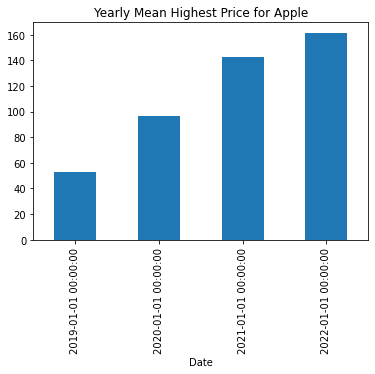

In [278]:
df['High'].resample('As').mean().plot.bar(title='Yearly Mean Highest Price for Apple');

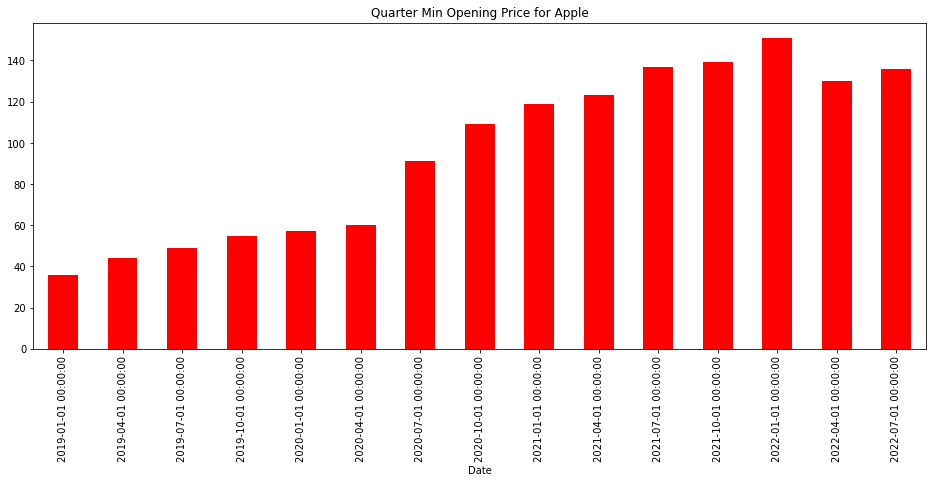

In [279]:
title = 'Quarter Min Opening Price for Apple'
df['Open'].resample('QS').min().plot.bar(figsize=(16,6), title=title,color='red');

# Time Shifting

We may need to shift all our data up or down along the time series index. It's good to have knowledge about it.

We will continue with our Apple stock data.

In [280]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168346,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366497,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833580,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753822,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.435398,164101200


**shift()** function shifts index by desired number of periods with an optional time freq. All details can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html).

In [282]:
df.shift(periods=2).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,38.722500,39.712502,38.557499,39.480000,38.168346,148158800.0
2019-01-07,35.994999,36.430000,35.500000,35.547501,34.366497,365248800.0
2019-01-08,36.132500,37.137501,35.950001,37.064999,35.833580,234428400.0


In [283]:
df.shift(periods=2).tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-23,173.029999,173.740005,171.309998,171.520004,171.520004,70211500.0
2022-08-24,169.690002,169.860001,167.139999,167.570007,167.570007,69026800.0
2022-08-25,167.080002,168.710007,166.649994,167.229996,167.229996,54147100.0
2022-08-26,167.320007,168.110001,166.250000,167.529999,167.529999,53841500.0
2022-08-29,168.779999,170.139999,168.350006,170.029999,170.029999,51218200.0


In [284]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-23,167.080002,168.710007,166.649994,167.229996,167.229996,54147100
2022-08-24,167.320007,168.110001,166.250000,167.529999,167.529999,53841500
2022-08-25,168.779999,170.139999,168.350006,170.029999,170.029999,51218200
2022-08-26,170.570007,171.050003,163.559998,163.619995,163.619995,78823500
2022-08-29,161.149994,162.899994,159.820007,161.380005,161.380005,73227700


As you can recognize, we will lose that last piece of data that no longer has an index!

We can also do shifting backwards.

In [285]:
df.shift(-5).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,37.822498,38.632500,37.407501,38.327499,37.054138,180396400.0
2019-01-03,38.125000,38.492500,37.715000,38.450001,37.172573,143122800.0
2019-01-04,38.220001,38.424999,37.877499,38.072498,36.807606,108092800.0
2019-01-07,37.712502,37.817501,37.305000,37.500000,36.254131,129756800.0
2019-01-08,37.567501,38.347500,37.512501,38.267502,36.996136,114843600.0


In [286]:
df.shift(-5).tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-16,167.080002,168.710007,166.649994,167.229996,167.229996,54147100.0
2022-08-17,167.320007,168.110001,166.250000,167.529999,167.529999,53841500.0
2022-08-18,168.779999,170.139999,168.350006,170.029999,170.029999,51218200.0
2022-08-19,170.570007,171.050003,163.559998,163.619995,163.619995,78823500.0
2022-08-22,161.149994,162.899994,159.820007,161.380005,161.380005,73227700.0
2022-08-23,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-24,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-25,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-26,NaN,NaN,NaN,NaN,NaN,NaN


We can choose to shift index values up or down without realigning the data by passing in a freq argument.
This method shifts dates to the next period based on a frequency code. Common codes are 'M' for month-end and 'A' for year-end.

In [287]:
df.shift(periods=1, freq='A').head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,38.722500,39.712502,38.557499,39.480000,38.168346,148158800
2019-12-31,35.994999,36.430000,35.500000,35.547501,34.366497,365248800
2019-12-31,36.132500,37.137501,35.950001,37.064999,35.833580,234428400
2019-12-31,37.174999,37.207500,36.474998,36.982498,35.753822,219111200
2019-12-31,37.389999,37.955002,37.130001,37.687500,36.435398,164101200


# Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a simple moving average. Let's look how to do this easily with pandas!

We will continue with our Apple stock data.

In [288]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168346,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366497,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833580,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753822,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.435398,164101200


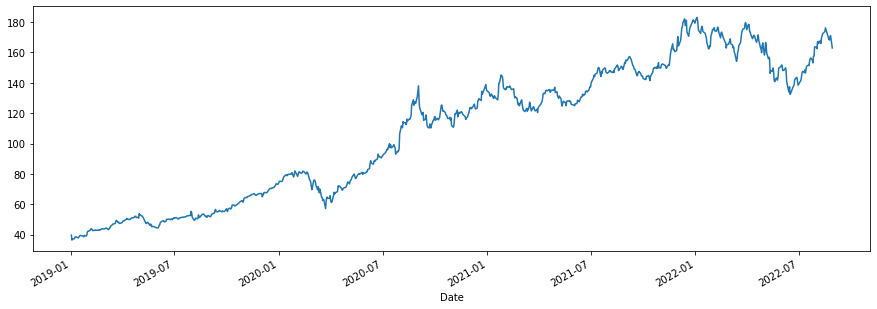

In [289]:
df["High"].plot(figsize=(15,5));

Now we will calculate rolling mean(moving average) with **rolling()** function.

In [290]:
df.rolling(window=7).mean().head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-10,37.337499,37.938215,36.962143,37.648571,36.397765,2.077954e+08
2019-01-11,37.265714,37.754286,36.865000,37.447499,36.203373,2.020717e+08
2019-01-14,37.511071,37.952500,37.122857,37.726428,36.473035,1.684299e+08


The average is calculated after first 7 days.

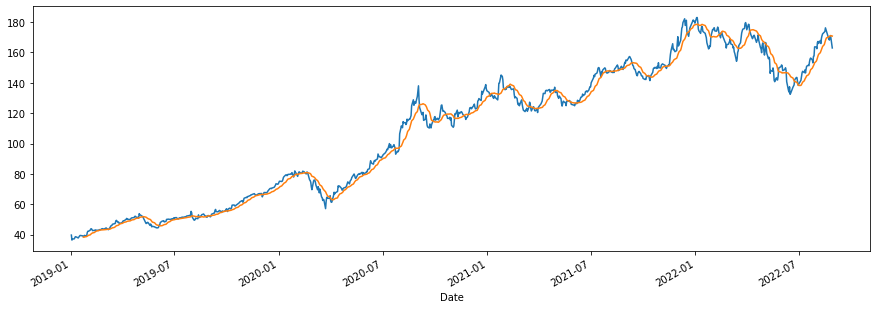

In [291]:
df["High"].plot(figsize=(15,5));
df.rolling(window=15).mean()["High"].plot();

Details about **rolling()** function can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html).

An expanding window yields the value of an aggregation statistic with all the data available up to that point in time. Since these calculations are a special case of rolling statistics, they are implemented in pandas.

In [292]:
df.expanding(1).sum().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168346,1.481588e+08
2019-01-03,74.717499,76.142502,74.057499,75.027501,72.534843,5.134076e+08
2019-01-04,110.849999,113.280003,110.007500,112.092500,108.368423,7.478360e+08
2019-01-07,148.024998,150.487503,146.482498,149.074998,144.122245,9.669472e+08
2019-01-08,185.414997,188.442505,183.612499,186.762498,180.557643,1.131048e+09


It starts to aggregate after first row as you can see because we expand 1 row. Let's do the same for 3.

In [293]:
df.expanding(3).sum().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,110.849999,113.280003,110.007500,112.092500,108.368423,7.478360e+08
2019-01-07,148.024998,150.487503,146.482498,149.074998,144.122245,9.669472e+08
2019-01-08,185.414997,188.442505,183.612499,186.762498,180.557643,1.131048e+09


For example, just to be clear, it's same with cumsum() function when we use 1 window.

In [294]:
df["Volume_cum"] = df.Volume.cumsum()

In [295]:
df["Volume_cum_check"] = df.Volume.expanding(1).sum()

In [296]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Volume_cum,Volume_cum_check
Date,,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168346,148158800,148158800,1.481588e+08
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366497,365248800,513407600,5.134076e+08
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833580,234428400,747836000,7.478360e+08
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753822,219111200,966947200,9.669472e+08
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.435398,164101200,1131048400,1.131048e+09


In [297]:
df.rolling(window=len(df), min_periods=1).mean().head()

,Open,High,Low,Close,Adj Close,Volume,Volume_cum,Volume_cum_check
Date,,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168346,1.481588e+08,148158800.0,148158800.0
2019-01-03,37.358750,38.071251,37.028750,37.513751,36.267421,2.567038e+08,330783200.0,330783200.0
2019-01-04,36.950000,37.760001,36.669167,37.364167,36.122808,2.492787e+08,469800800.0,469800800.0
2019-01-07,37.006249,37.621876,36.620624,37.268749,36.030561,2.417368e+08,594087400.0,594087400.0
2019-01-08,37.082999,37.688501,36.722500,37.352500,36.111529,2.262097e+08,701479600.0,701479600.0


Let's make a plot.

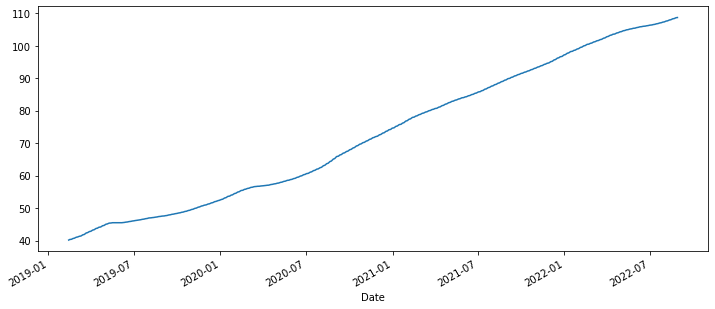

In [298]:
df['High'].expanding(min_periods=30).mean().plot(figsize=(12,5));

# Visualizing Time Series Data

Let's create amazing plots by using same dataframe.

In [299]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Volume_cum,Volume_cum_check
Date,,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168346,148158800,148158800,1.481588e+08
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366497,365248800,513407600,5.134076e+08
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833580,234428400,747836000,7.478360e+08
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753822,219111200,966947200,9.669472e+08
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.435398,164101200,1131048400,1.131048e+09


In order to make a time series plot, all of our indexes must be datetime. If it's not, we can convert it with **pd.to_datetime()** function as we showed above. Let's check it again.

In [300]:
df.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-14', '2019-01-15',
               ...
               '2022-08-16', '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-29'], dtype='datetime64[ns]', name='Date', length=922, freq=None)

First, let's plot daily high and low values.

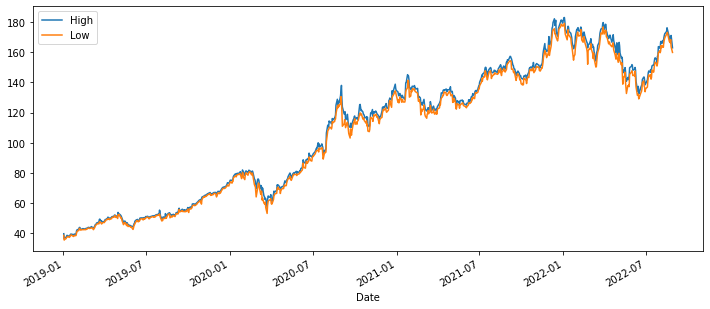

In [301]:
df[["High","Low"]].plot(figsize=(12,5));

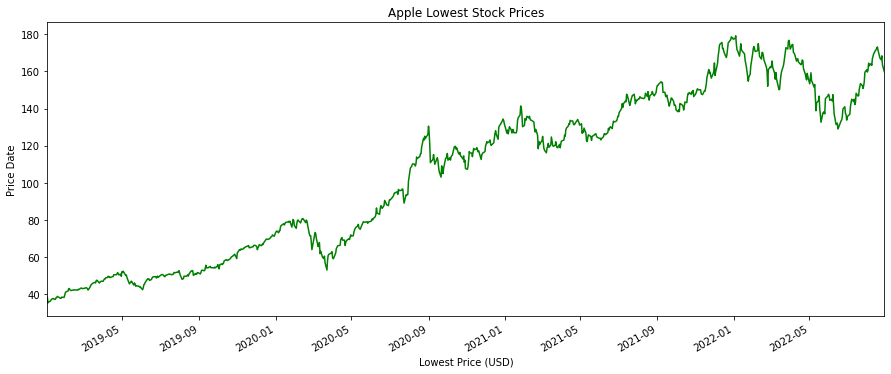

In [302]:
ax = df['Low'].plot(figsize=(15,6), title="Apple Lowest Stock Prices", color = "g")
ax.autoscale(axis='x',tight=True)
ax.set(xlabel="Lowest Price (USD)", ylabel="Price Date");

We can also filter data by using *xlim* and *ylim* parameter.

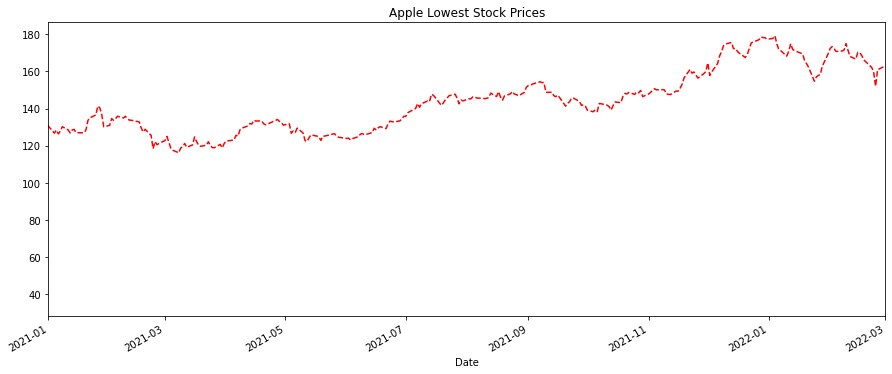

In [303]:
ax = df['Low'].plot(figsize=(15,6),
                    title="Apple Lowest Stock Prices", 
                    color = "red",
                    xlim=["2021-01-01","2022-03-01"],
                    ls= "--")

Let's create a boxplot of highest values monthly. First, we need to get the months of dates.

In [304]:
df["Month"] = df.index.month

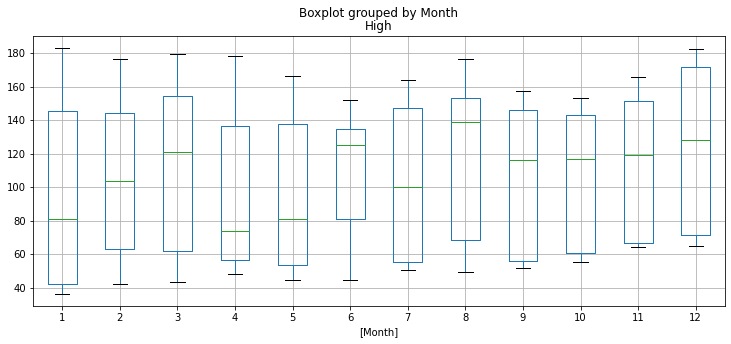

In [305]:
df[["High","Month"]].boxplot(by='Month',figsize=(12,5));

<div class="alert alert-block alert-success">
<b>Upcoming Tutorials</b>
    <li>Time Series with Statsmodels</li>
    <li>Forecasting</li>
    <li>Forecasting with Deep Learning</li>
    <li>Facebook's Probhet</li>
    <li>Facebook's Kats</li>
    
</div>

Stay motivated!